## Aim

Process the gender and race coded data. 

Later, codes here became part of `get_authorid_with_vars.py`

In [69]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
names = ['haley', 'jongmin', 'jaemin', 'jeff', 'matthew', 'michelle']
data_dir = '../../data/interim/gender_race_result'

In [71]:
haley = pd.read_csv(f'{data_dir}/haley.csv')
matthew = pd.read_csv(f'{data_dir}/matthew.csv')
michelle = pd.read_csv(f'{data_dir}/michelle.csv')
jeff = pd.read_csv(f'{data_dir}/jeff.csv')
jongmin = pd.read_csv(f'{data_dir}/jongmin.csv')
jaemin = pd.read_csv(f'{data_dir}/jaemin.csv')

In [72]:
cutoff = 2000

In [73]:
haley = haley[haley.year >= cutoff][['authorID', 'gender_prediction', 'race_prediction']]
set(haley.gender_prediction), set(haley.race_prediction)

({'F', 'M', 'N'}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [74]:
matthew = matthew[matthew.year >= cutoff][['authorID', 'gender_prediction', 'race_prediction']]
set(matthew.gender_prediction), set(matthew.race_prediction)

({'F', 'M', 'f', 'm', 'n'}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [75]:
jeff = jeff[jeff.year >= cutoff][['authorID', 'gender_prediction', 'race_prediction']]
set(jeff.gender_prediction), set(jeff.race_prediction)

({'F', 'M'}, {0.0, 1.0, 2.0, 3.0})

In [76]:
michelle = michelle[michelle.year >= cutoff][['authorID', 'gender_prediction', 'race_prediction']]
set(michelle.gender_prediction), set(michelle.race_prediction)

({'F', 'M'}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [77]:
jaemin = jaemin[jaemin.year >= cutoff][['authorID', 'gender_prediction', 'race_prediction']]
set(jaemin.gender_prediction), set(jaemin.race_prediction)

({'F', 'M', 'N'}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [48]:
jongmin = jongmin[jongmin.year >= cutoff][['authorID', 'gender_prediction', 'race_prediction']]
set(jongmin.gender_prediction), set(jongmin.race_prediction)

({'F', 'M'}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [13]:
authorid_gender_dict = {}

In [14]:
df = pd.concat([haley, jeff, michelle, matthew, jaemin, jongmin], ignore_index = True)
df['gender_prediction'] = [x.upper() for x in df.gender_prediction]
df.head()

,authorID,gender_prediction,race_prediction
0,10.1093/jcmc/zmab024+1.0,M,1.0
1,10.1093/joc/jqab044+4.0,M,2.0
2,10.1093/hcr/hqab020+1.0,M,0.0
3,10.1093/hcr/hqac004+1.0,F,0.0
4,10.1093/jcmc/zmab019+5.0,F,0.0


In [15]:
set(df.gender_prediction)

{'F', 'M', 'N'}

In [16]:
def recode_race(row):
    race_txt = 'race_prediction'
    if row[race_txt] == 0:
        return 'White'
    elif row[race_txt] == 1:
        return 'Black'
    elif row[race_txt] == 2:
        return 'Asian'
    elif row[race_txt] == 3:
        return 'Hispanic'
    elif row[race_txt] == 4:
        return 'Middle Eastern'
    elif row[race_txt] == 5:
        return 'Indigenous'

In [17]:
df['race'] = df.apply(recode_race, axis = 1)

<AxesSubplot:xlabel='race', ylabel='count'>

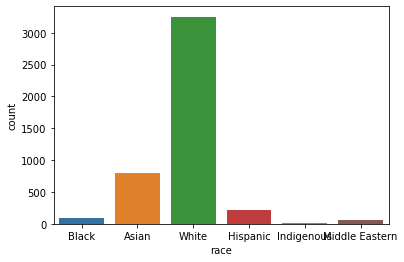

In [18]:
sns.countplot(x = 'race', data = df)

<AxesSubplot:xlabel='gender_prediction', ylabel='count'>

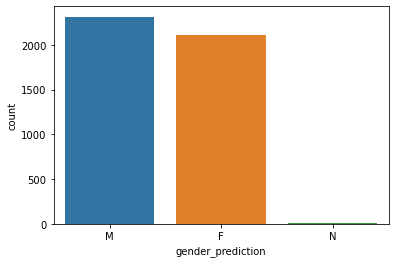

In [19]:
sns.countplot(x = 'gender_prediction', data = df)

In [20]:
df['race_plus_gender'] = df['race'] + df['gender_prediction']

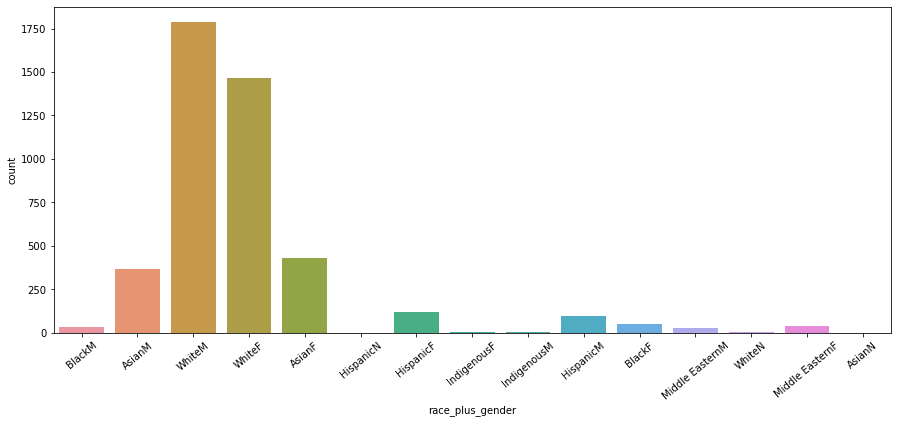

In [21]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'race_plus_gender', data = df)
# plt.xticks(rotation=45)
ax.tick_params(axis='x', rotation=40)

In [22]:
df.shape

(4434, 5)

In [23]:
df

,authorID,gender_prediction,race_prediction,race,race_plus_gender
0,10.1093/jcmc/zmab024+1.0,M,1.0,Black,BlackM
1,10.1093/joc/jqab044+4.0,M,2.0,Asian,AsianM
2,10.1093/hcr/hqab020+1.0,M,0.0,White,WhiteM
3,10.1093/hcr/hqac004+1.0,F,0.0,White,WhiteF
4,10.1093/jcmc/zmab019+5.0,F,0.0,White,WhiteF
...,...,...,...,...,...
4429,10.1111/j.1468-2958.2010.01389.x+1.0,M,0.0,White,WhiteM
4430,10.1111/j.1460-2466.2010.01486.x+2.0,M,0.0,White,WhiteM
4431,10.1111/j.1083-6101.2010.01508.x+4.0,M,0.0,White,WhiteM
4432,10.1111/j.1083-6101.2009.01511.x+2.0,F,0.0,White,WhiteF


In [111]:
aff_df = pd.read_csv('aff_df.csv')
aff_df = aff_df[['authorID', 'new_country_code', 'new_afftype']]
aff_df

,authorID,new_country_code,new_afftype
0,10.1093/jcmc/zmab019+4.0,AT,Education
1,10.1093/jcmc/zmab019+5.0,AT,Education
2,10.1093/joc/jqab052+5.0,US,Education
3,10.1093/ccc/tcac007+1.0,CN,Education
4,10.1093/joc/jqac012+4.0,US,Education
...,...,...,...
4429,10.1111/j.1083-6101.2010.01508.x+7.0,US,Education
4430,10.1111/j.1753-9137.2010.01073.x+2.0,MX,Education
4431,10.1111/j.1083-6101.2010.01532.x+1.0,US,Education
4432,10.1111/j.1753-9137.2010.01079.x+1.0,US,Education


In [114]:
pd.merge(aff_df, df, on = 'authorID')

,authorID,new_country_code,new_afftype,gender_prediction,race_prediction,race,race_plus_gender
0,10.1093/jcmc/zmab019+4.0,AT,Education,F,0.0,White,WhiteF
1,10.1093/jcmc/zmab019+5.0,AT,Education,F,0.0,White,WhiteF
2,10.1093/joc/jqab052+5.0,US,Education,F,2.0,Asian,AsianF
3,10.1093/ccc/tcac007+1.0,CN,Education,F,0.0,White,WhiteF
4,10.1093/joc/jqac012+4.0,US,Education,M,0.0,White,WhiteM
...,...,...,...,...,...,...,...
4429,10.1111/j.1083-6101.2010.01508.x+7.0,US,Education,F,0.0,White,WhiteF
4430,10.1111/j.1753-9137.2010.01073.x+2.0,MX,Education,M,3.0,Hispanic,HispanicM
4431,10.1111/j.1083-6101.2010.01532.x+1.0,US,Education,F,3.0,Hispanic,HispanicF
4432,10.1111/j.1753-9137.2010.01079.x+1.0,US,Education,F,2.0,Asian,AsianF


In [116]:
set(aff_df.authorID) == set(df.authorID)

True